In [1]:
'''
This code contains the explicit version of dorsal-to and anterior-to ontology violations
'''

'\nThis code contains the explicit version of dorsal-to and anterior-to ontology violations\n'

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.misc as misc
import warnings
warnings.filterwarnings('ignore')

#### Helper Functions

In [3]:
def eigen_vectors(mask):
    y, x = np.nonzero(mask)
    mean_x = np.mean(x)
    mean_y = np.mean(y)
    x = x - np.mean(x)
    y = y - np.mean(y)
    coords = np.vstack([x, y])
    cov = np.cov(coords)
    evals, evecs = np.linalg.eig(cov)
    sort_indices = np.argsort(evals)[::-1]
    x_v1, y_v1 = evecs[:, sort_indices[0]]  # Eigenvector with largest eigenvalue
    x_v2, y_v2 = evecs[:, sort_indices[1]]
    return np.array([x_v1, y_v1]), np.array([x_v2, y_v2]), mean_x, mean_y, x, y

def trait_coords(mask, trait_idx, mean_x, mean_y):
    trait = (mask == trait_idx).astype(float)
    y, x = np.nonzero(trait)
    x = x - mean_x
    y = y - mean_y
    return x, y

def projection(u, v):
    '''
    input: u, v numpy array
    output: vector projection of u on v
    '''
    proj_u_on_v = (np.dot(u, v)/np.dot(v, v))*v
    return proj_u_on_v

def average_projection_point(trait_x, trait_y, eig_v):
    proj_x = []
    proj_y = []
    for idx in range(trait_x.shape[0]):
        proj_ = projection(np.array([trait_x[idx], trait_y[idx]]), eig_v)
        proj_x.append(proj_[0])        
        proj_y.append(proj_[1])
    mid_x = np.sum(proj_x)/len(proj_x)
    mid_y = np.sum(proj_y)/len(proj_y)
    return np.array([mid_x, mid_y])

In [4]:
def dorsal_to_explicit(mask, channel_wise=False):
    if channel_wise:
        decoded_channel = np.zeros((mask.shape[0], mask.shape[1]))
        for ch in range(0, mask.shape[2]):
            decoded_channel += ((ch+1)*mask[:, :, ch])
        mask = decoded_channel
        
    pc1, pc2, mean_x, mean_y, x, y = eigen_vectors(mask)
    
    dorsal_x, dorsal_y = trait_coords(mask, trait_idx=1, mean_x=mean_x, mean_y=mean_y) # dorsal
    dorsal_mid = average_projection_point(dorsal_x, dorsal_y, pc2) # dorsal mid point on pc2

    adipose_x, adipose_y = trait_coords(mask, trait_idx=2, mean_x=mean_x, mean_y=mean_y) # adipose
    adipose_mid = average_projection_point(dorsal_x, dorsal_y, pc2)
    
    pectoral_x, pectoral_y = trait_coords(mask, trait_idx=6, mean_x=mean_x, mean_y=mean_y) # dorsal
    pectoral_mid = average_projection_point(pectoral_x, pectoral_y, pc2) # pectoral mid point on pc2

    pelvic_x, pelvic_y = trait_coords(mask, trait_idx=5, mean_x=mean_x, mean_y=mean_y) # dorsal
    pelvic_mid = average_projection_point(pelvic_x, pelvic_y, pc2) # pelvic mid point on pc2

    anal_x, anal_y = trait_coords(mask, trait_idx=4, mean_x=mean_x, mean_y=mean_y) # dorsal
    anal_mid = average_projection_point(anal_x, anal_y, pc2) # anal mid point on pc2

    penalty = 0 
    
    if dorsal_mid[0] != dorsal_mid[0]: # no dorsal fin has been predicted
        return penalty # returning 0 penalty
    else:
        if dorsal_mid[1] < 0: # opposite side of dorsal should be positive
            if pectoral_mid[0] == pectoral_mid[0]:
                penalty += float(pectoral_mid[1] < dorsal_mid[1])
            if pelvic_mid[0] == pelvic_mid[0]:
                penalty += float(pelvic_mid[1] < dorsal_mid[1])
            if anal_mid[0] == anal_mid[0]:
                penalty += float(anal_mid[1] < dorsal_mid[1])
                
            if adipose_mid[0] == adipose_mid[0]: # adipose fin has been predicted
                if pectoral_mid[0] == pectoral_mid[0]:
                    penalty += float(pectoral_mid[1] < adipose_mid[1])
                if pelvic_mid[0] == pelvic_mid[0]:
                    penalty += float(pelvic_mid[1] < adipose_mid[1])
                if anal_mid[0] == anal_mid[0]:
                    penalty += float(anal_mid[1] < adipose_mid[1])
                    
        elif dorsal_mid[1] > 0: # opposite side of dorsal should be negative
            if pectoral_mid[0] == pectoral_mid[0]:
                penalty += float(pectoral_mid[1] > dorsal_mid[1])
            if pelvic_mid[0] == pelvic_mid[0]:
                penalty += float(pelvic_mid[1] > dorsal_mid[1])
            if anal_mid[0] == anal_mid[0]:
                penalty += float(anal_mid[1] > dorsal_mid[1])   
            
            if adipose_mid[0] == adipose_mid[0]: # adipose fin has been predicted
                if pectoral_mid[0] == pectoral_mid[0]:
                    penalty += float(pectoral_mid[1] > adipose_mid[1])
                if pelvic_mid[0] == pelvic_mid[0]:
                    penalty += float(pelvic_mid[1] > adipose_mid[1])
                if anal_mid[0] == anal_mid[0]:
                    penalty += float(anal_mid[1] > adipose_mid[1])
                    
    return penalty

In [16]:
def anterior_to_explicit(mask, channel_wise=False):
    if channel_wise:
        decoded_channel = np.zeros((mask.shape[0], mask.shape[1]))
        for ch in range(0, mask.shape[2]):
            decoded_channel += ((ch+1)*mask[:, :, ch])
        mask = decoded_channel
        
    pc1, pc2, mean_x, mean_y, x, y = eigen_vectors(mask)
    
    dorsal_x, dorsal_y = trait_coords(mask, trait_idx=1, mean_x=mean_x, mean_y=mean_y) # dorsal
    dorsal_mid = average_projection_point(dorsal_x, dorsal_y, pc1) # dorsal mid point on pc1
    
    adipose_x, adipose_y = trait_coords(mask, trait_idx=2, mean_x=mean_x, mean_y=mean_y) # adipose
    adipose_mid = average_projection_point(adipose_x, adipose_y, pc1) # adipose mid point on pc1
    
    pectoral_x, pectoral_y = trait_coords(mask, trait_idx=6, mean_x=mean_x, mean_y=mean_y) # dorsal
    pectoral_mid = average_projection_point(pectoral_x, pectoral_y, pc1) # pectoral mid point on pc1
    
    pelvic_x, pelvic_y = trait_coords(mask, trait_idx=5, mean_x=mean_x, mean_y=mean_y) # dorsal
    pelvic_mid = average_projection_point(pelvic_x, pelvic_y, pc1) # pelvic mid point on pc1
    
    anal_x, anal_y = trait_coords(mask, trait_idx=4, mean_x=mean_x, mean_y=mean_y) # dorsal
    anal_mid = average_projection_point(anal_x, anal_y, pc1) # anal mid point on pc1
    
    head_x, head_y = trait_coords(mask, trait_idx=7, mean_x=mean_x, mean_y=mean_y) # dorsal
    head_mid = average_projection_point(head_x, head_y, pc1) # anal mid point on pc1
    
    caudal_x, caudal_y = trait_coords(mask, trait_idx=3, mean_x=mean_x, mean_y=mean_y) # dorsal
    caudal_mid = average_projection_point(caudal_x, caudal_y, pc1) # anal mid point on pc1
    
    penalty = 0
    if head_mid[0] != head_mid[0]: # no head has been predicted
        return penalty # returning 0 penalty
    
    if head_mid[0] < 0: #opposite side of head is positive

        if (pectoral_mid[0] == pectoral_mid[0]) and (anal_mid[0] == anal_mid[0]):
            penalty += float(pectoral_mid[0] > anal_mid[0])
        if (pectoral_mid[0] == pectoral_mid[0]) and (pelvic_mid[0] == pelvic_mid[0]):
            penalty += float(pectoral_mid[0] > pelvic_mid[0])
        if (pelvic_mid[0] == pelvic_mid[0]) and (anal_mid[0] == anal_mid[0]):
            penalty += float(pelvic_mid[0] > anal_mid[0])
        if (dorsal_mid[0] == dorsal_mid[0]) and (caudal_mid[0] == caudal_mid[0]):
            penalty += float(dorsal_mid[0] > caudal_mid[0])
        if (pectoral_mid[0] == pectoral_mid[0]) and (caudal_mid[0] == caudal_mid[0]):
            penalty += float(pectoral_mid[0] > caudal_mid[0])
        if (pelvic_mid[0] == pelvic_mid[0]) and (caudal_mid[0] == caudal_mid[0]):
            penalty += float(pelvic_mid[0] > caudal_mid[0])
        if (anal_mid[0] == anal_mid[0]) and (caudal_mid[0] == caudal_mid[0]):
            penalty += float(anal_mid[0] > caudal_mid[0])
        if adipose_mid[0] == adipose_mid[0]:
            if dorsal_mid[0] == dorsal_mid[0]:
                penalty += float(dorsal_mid[0] > adipose_mid[0])
            if caudal_mid[0] == caudal_mid[0]:
                penalty += float(adipose_mid[0] > caudal_mid[0])

    elif head_mid[0] > 0: #head side is positive
        if (pectoral_mid[0] == pectoral_mid[0]) and (anal_mid[0] == anal_mid[0]):
            penalty += float(pectoral_mid[0] < anal_mid[0])
        if (pectoral_mid[0] == pectoral_mid[0]) and (pelvic_mid[0] == pelvic_mid[0]):
            penalty += float(pectoral_mid[0] < pelvic_mid[0])
        if (pelvic_mid[0] == pelvic_mid[0]) and (anal_mid[0] == anal_mid[0]):
            penalty += float(pelvic_mid[0] < anal_mid[0])
        if (dorsal_mid[0] == dorsal_mid[0]) and (caudal_mid[0] == caudal_mid[0]):
            penalty += float(dorsal_mid[0] < caudal_mid[0])
        if (pectoral_mid[0] == pectoral_mid[0]) and (caudal_mid[0] == caudal_mid[0]):
            penalty += float(pectoral_mid[0] < caudal_mid[0])
        if (pelvic_mid[0] == pelvic_mid[0]) and (caudal_mid[0] == caudal_mid[0]):
            penalty += float(pelvic_mid[0] < caudal_mid[0])
        if (anal_mid[0] == anal_mid[0]) and (caudal_mid[0] == caudal_mid[0]):
            penalty += float(anal_mid[0] < caudal_mid[0])
        if adipose_mid[0] == adipose_mid[0]:
            if dorsal_mid[0] == dorsal_mid[0]:
                penalty += float(dorsal_mid[0] < adipose_mid[0])
            if caudal_mid[0] == caudal_mid[0]:
                penalty += float(adipose_mid[0] < caudal_mid[0])
                
    return penalty



In [45]:
from scripts.plot_settings import global_settings
global_settings()

def plot_dorsal_to(mask, channel_wise=False):
    if channel_wise:
        decoded_channel = np.zeros((mask.shape[0], mask.shape[1]))
        for ch in range(0, mask.shape[2]):
            decoded_channel += ((ch+1)*mask[:, :, ch])
        mask = decoded_channel
        
    pc1, pc2, mean_x, mean_y, x, y = eigen_vectors(mask)
    
    dorsal_x, dorsal_y = trait_coords(mask, trait_idx=1, mean_x=mean_x, mean_y=mean_y) # dorsal
    dorsal_mid = average_projection_point(dorsal_x, dorsal_y, pc2) # dorsal mid point on pc2

    adipose_x, adipose_y = trait_coords(mask, trait_idx=2, mean_x=mean_x, mean_y=mean_y) # adipose
    adipose_mid = average_projection_point(adipose_x, adipose_y, pc2)
    
    pectoral_x, pectoral_y = trait_coords(mask, trait_idx=6, mean_x=mean_x, mean_y=mean_y) # dorsal
    pectoral_mid = average_projection_point(pectoral_x, pectoral_y, pc2) # pectoral mid point on pc2

    pelvic_x, pelvic_y = trait_coords(mask, trait_idx=5, mean_x=mean_x, mean_y=mean_y) # dorsal
    pelvic_mid = average_projection_point(pelvic_x, pelvic_y, pc2) # pelvic mid point on pc2

    anal_x, anal_y = trait_coords(mask, trait_idx=4, mean_x=mean_x, mean_y=mean_y) # dorsal
    anal_mid = average_projection_point(anal_x, anal_y, pc2) # anal mid point on pc2
    
    scale = 200

    fig, ax = plt.subplots(figsize=(8, 6))
    plt.plot(x, y, 'k.')
    plt.plot([pc1[0]*-scale*2, pc1[0]*scale*2],
             [pc1[1]*-scale*2, pc1[1]*scale*2], color='green')
    plt.plot([pc2[0]*-scale*2, pc2[0]*scale*2],
             [pc2[1]*-scale*2, pc2[1]*scale*2], color='blue')

    if dorsal_mid[0] == dorsal_mid[0]:
        plt.plot(dorsal_x, dorsal_y, 'r.', alpha=0.2)
        plt.plot(dorsal_mid[0], dorsal_mid[1], 'k*')
        plt.plot(dorsal_mid[0], dorsal_mid[1], 'r.')
    if adipose_mid[0] == adipose_mid[0]:
        plt.plot(adipose_x, adipose_y, 'g.', alpha=0.2)
        plt.plot(adipose_mid[0], adipose_mid[1], 'k*')
        plt.plot(adipose_mid[0], adipose_mid[1], 'g.')
    if anal_mid[0] == anal_mid[0]:
        plt.plot(anal_x, anal_y, 'y.', alpha=0.2)
        plt.plot(anal_mid[0], anal_mid[1], 'k*')
        plt.plot(anal_mid[0], anal_mid[1], 'y.')
    if pectoral_mid[0] == pectoral_mid[0]:
        plt.plot(pectoral_x, pectoral_y, 'm.', alpha=0.2)
        plt.plot(pectoral_mid[0], pectoral_mid[1], 'k*')
        plt.plot(pectoral_mid[0], pectoral_mid[1], 'm.')
    if pelvic_mid[0] == pelvic_mid[0]:
        plt.plot(pelvic_x, pelvic_y, 'c.', alpha=0.2)
        plt.plot(pelvic_mid[0], pelvic_mid[1], 'k*')
        plt.plot(pelvic_mid[0], pelvic_mid[1], 'c.')
    if anal_mid[0] == anal_mid[0]:
        plt.plot(anal_x[0], anal_y[1], 'y.', alpha=0.2)
        plt.plot(anal_mid[0], anal_mid[1], 'k*')
        plt.plot(anal_mid[0], anal_mid[1], 'y.')
    plt.axis('equal')
    plt.gca().invert_yaxis()  # Match the image system with origin at top left
    plt.show()
    
    
def plot_anterior_to(mask, channel_wise=False):
    if channel_wise:
        decoded_channel = np.zeros((mask.shape[0], mask.shape[1]))
        for ch in range(0, mask.shape[2]):
            decoded_channel += ((ch+1)*mask[:, :, ch])
        mask = decoded_channel
        
    pc1, pc2, mean_x, mean_y, x, y = eigen_vectors(mask)
    
    dorsal_x, dorsal_y = trait_coords(mask, trait_idx=1, mean_x=mean_x, mean_y=mean_y) # dorsal
    dorsal_mid = average_projection_point(dorsal_x, dorsal_y, pc1) # dorsal mid point on pc2

    adipose_x, adipose_y = trait_coords(mask, trait_idx=2, mean_x=mean_x, mean_y=mean_y) # adipose
    adipose_mid = average_projection_point(adipose_x, adipose_y, pc1)
    
    pectoral_x, pectoral_y = trait_coords(mask, trait_idx=6, mean_x=mean_x, mean_y=mean_y) # dorsal
    pectoral_mid = average_projection_point(pectoral_x, pectoral_y, pc1) # pectoral mid point on pc2

    pelvic_x, pelvic_y = trait_coords(mask, trait_idx=5, mean_x=mean_x, mean_y=mean_y) # dorsal
    pelvic_mid = average_projection_point(pelvic_x, pelvic_y, pc1) # pelvic mid point on pc2

    anal_x, anal_y = trait_coords(mask, trait_idx=4, mean_x=mean_x, mean_y=mean_y) # dorsal
    anal_mid = average_projection_point(anal_x, anal_y, pc1) # anal mid point on pc2
    
    scale = 200

    fig, ax = plt.subplots(figsize=(8, 6))
    plt.plot(x, y, 'k.')
    plt.plot([pc1[0]*-scale*2, pc1[0]*scale*2],
             [pc1[1]*-scale*2, pc1[1]*scale*2], color='green')
    plt.plot([pc2[0]*-scale*2, pc2[0]*scale*2],
             [pc2[1]*-scale*2, pc2[1]*scale*2], color='blue')

    if dorsal_mid[0] == dorsal_mid[0]:
        plt.plot(dorsal_x, dorsal_y, 'r.', alpha=0.2)
        plt.plot(dorsal_mid[0], dorsal_mid[1], 'k*')
        plt.plot(dorsal_mid[0], dorsal_mid[1], 'r.')
    if adipose_mid[0] == adipose_mid[0]:
        plt.plot(adipose_x, adipose_y, 'g.', alpha=0.2)
        plt.plot(adipose_mid[0], adipose_mid[1], 'k*')
        plt.plot(adipose_mid[0], adipose_mid[1], 'g.')
    if anal_mid[0] == anal_mid[0]:
        plt.plot(anal_x, anal_y, 'y.', alpha=0.2)
        plt.plot(anal_mid[0], anal_mid[1], 'k*')
        plt.plot(anal_mid[0], anal_mid[1], 'y.')
    if pectoral_mid[0] == pectoral_mid[0]:
        plt.plot(pectoral_x, pectoral_y, 'm.', alpha=0.2)
        plt.plot(pectoral_mid[0], pectoral_mid[1], 'k*')
        plt.plot(pectoral_mid[0], pectoral_mid[1], 'm.')
    if pelvic_mid[0] == pelvic_mid[0]:
        plt.plot(pelvic_x, pelvic_y, 'c.', alpha=0.2)
        plt.plot(pelvic_mid[0], pelvic_mid[1], 'k*')
        plt.plot(pelvic_mid[0], pelvic_mid[1], 'c.')
    if anal_mid[0] == anal_mid[0]:
        plt.plot(anal_x[0], anal_y[1], 'y.', alpha=0.2)
        plt.plot(anal_mid[0], anal_mid[1], 'k*')
        plt.plot(anal_mid[0], anal_mid[1], 'y.')
    plt.axis('equal')
    plt.gca().invert_yaxis()  # Match the image system with origin at top left
    plt.show()
    

In [49]:
# mask = misc.imread('INHS_FISH_30228.png', flatten=1)
# print(anterior_to_explicit(mask))
# plot_anterior_to(mask)

In [47]:
%matplotlib inline

import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
from PIL import Image

from torch.utils.data import DataLoader
from torch.utils.data import Dataset as BaseDataset

import torch
import seaborn as sns
import pylab as py
import pandas as pd

class Dataset(BaseDataset):
    ''' Works for our fish dataset.
    This module will read image from the location/directory you have provided.
    This module can apply any default augmentation or can apply preprocessing transformations.
    
    Args:
        images_dir (str): path to images folder
        masks_dir (str): path to segmentation masks folder
        class_values (list): values of classes to extract from segmentation mask
        augmentation (albumentations.Compose): data transfromation pipeline 
            (e.g. flip, scale, etc.)
        preprocessing (albumentations.Compose): data preprocessing 
            (e.g. normalization, shape manipulation, etc.)
    '''
    
    # The label set this dataset has:    
    CLASSES = ['background', 'dorsal', 'adipose', 'caudal', 'anal', 
               'pelvic', 'pectoral', 'head', 'eye', 
               'caudal-ray', 'alt-ray', 'alt-spine', 'trunk']
    
    def __init__(self, images_dir, masks_dir=None, classes=None, augmentation=None, preprocessing=None,):
        
        # list all fils in images_dir folder
        self.ids = os.listdir(images_dir)
        
        
        # remove all non-image/non-mask files
        # self.images_fps contains image list
        # self.masks_fps contains mask list
        
        self.images_fps = [os.path.join(images_dir, image_id) for image_id in self.ids]
        self.images_fps = [items for items in self.images_fps if items[-4:]=='.png']
        
        if masks_dir is not None:
            self.masks_fps = [os.path.join(masks_dir, image_id) for image_id in self.ids]
            self.masks_fps = [items for items in self.masks_fps if items[-4:]=='.png']
        
        
        # convert str names to class values on masks
        self.class_values = [self.CLASSES.index(cls.lower()) for cls in classes]
        
        # initialize augmentation and preprocessing 
        self.augmentation = augmentation
        self.preprocessing = preprocessing
        self.masks_dir = masks_dir
        
    def __getitem__(self, i):
        
        # this module will run for each image with index i
        
        # read the image
        image = cv2.imread(self.images_fps[i])
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        # read the mask
        if self.masks_dir is not None:
            mask = cv2.imread(self.masks_fps[i], 0)
        
        
            # separate channel for different masks -> [:, :, channel]
            masks = [(mask == v) for v in self.class_values]
            mask = np.stack(masks, axis=-1).astype('float')
        
        # apply augmentations
        if self.augmentation:
            if self.masks_dir is not None:
                sample = self.augmentation(image=image, mask=mask)
                image, mask = sample['image'], sample['mask']
            else:
                sample = self.augmentation(image=image)
                image = sample['image']
                mask = None
        
        # apply preprocessing
        if self.preprocessing:
            if self.masks_dir is not None:
                sample = self.preprocessing(image=image, mask=mask)
                image, mask = sample['image'], sample['mask']
            else:
                sample = self.preprocessing(image=image)
                image = sample['image']
                mask = None
            
        return image, mask
    
    
    def __len__(self):
        return len(self.images_fps)  
    

    
##### Assign the location of your datasets

DATA_DIR = '/raid/maruf/data-800/'

# train set
x_train_dir = os.path.join(DATA_DIR, 'train')
y_train_dir = os.path.join(DATA_DIR, 'trainannot')

# validation set
x_valid_dir = os.path.join(DATA_DIR, 'val')
y_valid_dir = os.path.join(DATA_DIR, 'valannot')


# test set
x_test_dir = os.path.join(DATA_DIR, 'test')
y_test_dir = os.path.join(DATA_DIR, 'testannot')

dataset = Dataset(x_train_dir, 
                  y_train_dir,
                 classes = ['dorsal', 'adipose', 'caudal', 'anal', 
                            'pelvic', 'pectoral', 'head', 'eye', 
                            'caudal-ray', 'alt-ray', 'alt-spine', 'trunk'])

93 anterior_to penalty: 1.0


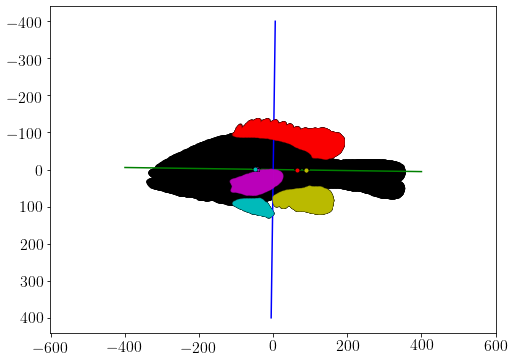

286 anterior_to penalty: 1.0


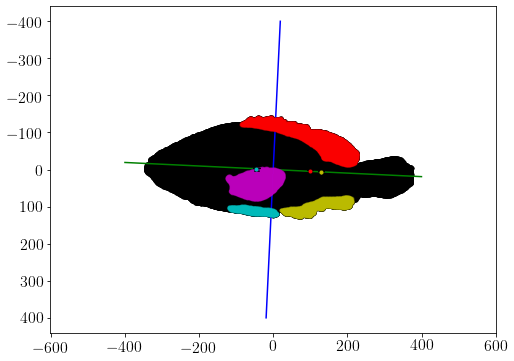

In [48]:
for idx in range(len(dataset)):
    i_, mask = dataset[idx]
    penalty_dorsal_to = dorsal_to_explicit(mask, channel_wise=True)
    
    if penalty_dorsal_to != 0:
        print(idx, 'dorsal_to penalty:', penalty_dorsal_to)
        # plot the fish image that violates dorsal to 
        plot_dorsal_to(mask, channel_wise=True)
        
    penalty_anterior_to = anterior_to_explicit(mask, channel_wise=True)
    
    if penalty_anterior_to != 0:
        print(idx, 'anterior_to penalty:', penalty_anterior_to)
        # plot the fish image that violates anterior to
        plot_anterior_to(mask, channel_wise=True)
    